In [1]:
from imports import *
plt.rc('figure', max_open_warning=200)
%matplotlib notebook
sns.set_theme()
import plotly.graph_objs as go
import plotly.express as px

/home/lipperrdino/verenv/virt/lib/python3.10/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [2]:
init_dir_path = os.path.join('/home/lipperrdino/verenv/', 'work_data')
data_raw = mne.io.read_raw_edf(os.path.join(init_dir_path, r"pigarev_sleep.edf"), preload=True)



Extracting EDF parameters from /home/lipperrdino/verenv/work_data/pigarev_sleep.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12505999  =      0.000 ... 12505.999 secs...


In [3]:
data_raw.drop_channels(['E', 'DC01', 'DC02', 'DC03', 'DC04', 'DC05', 'DC06', 'DC07', 'DC08', 'DC09', 'DC10', 'DC11', 'DC12', 'DC13', 'DC14', 'DC15', 'DC16', 'EEG Mark1', 'EEG Mark2', 'FTT7h', 'TPP7h', 'FFC5h', 'CCP5h', 'FCC3h', 'CPP3h', 'PPO9h', 'OI1h', 'I1', 'CCP1h', 'PPO1h', 'AFF1h', 'FFC1h', 'FFC2h', 'AFF2h', 'PPO2h', 'CCP2h', 'I2', 'OI2h', 'PPO10h', 'CPP4h', 'FCC4h', 'CCP6h', 'FFC6h', 'TPP8h', 'FTT8h', 'TTP7h', 'TPP9h', 'FTT9h', 'FFT9h', 'FFT7h', 'AFF5h', 'FCC5h', 'FFC3h', 'CCP3h', 'CPP5h', 'POO9h', 'POO5h', 'CPP1h', 'POO1', 'AFp1', 'FCC1h', 'FCC2h', 'AFp2', 'POO2', 'CPP2h', 'POO6h', 'POO10h', 'CPP6h', 'CCP4h', 'FFC4h', 'FCC6h', 'AFF6h', 'FFT8h', 'FFT10h', 'FTT10h', 'TTP8h', 'TPP10h', 'BP1', 'BP2', 'BP3', 'BP4', 'Events/Markers'])

<RawEDF | pigarev_sleep.edf, 70 x 12506000 (12506.0 s), ~6.52 GB, data loaded>

In [4]:
# a7 = np.array([0, 410, 611, 1046, 1767, 2018, 2494])*5.0
# a9 = np.array([0, 408, 611, 1037, 1066, 1673, 1755, 1812, 2018])*5.0
# a10 = np.array([0, 410, 611, 1042, 1066, 1683, 1755, 1815, 2018, 2494])*5.0

# d7 = np.append(a7[1:], 2497*5.0) - a7
# d9 = np.append(a9[1:], 2497*5.0) - a9
# d10 = np.append(a10[1:], 2497*5.0) - a10

In [5]:
# my_annot7 = mne.Annotations(
#     onset=a7, 
#     duration=d7,
#     description=[f'stage {n}, total:7' for n in range(7)]
# )
# my_annot9 = mne.Annotations(
#     onset=a9, 
#     duration=d9,
#     description=[f'stage {n}, total:9' for n in range(9)]
# )
# my_annot10 = mne.Annotations(
#     onset=a10, 
#     duration=d10,
#     description=[f'stage {n}, total:10' for n in range(10)]
# )
# my_annot = my_annot7 + my_annot9 + my_annot10
# print(my_annot)
# data_raw.set_annotations(my_annot)
# # data_raw.set_annotations(my_annot9)
# # data_raw.set_annotations(my_annot10)

In [6]:
# print(data_raw.annotations)

In [7]:
# data_raw.save('raw_with_annotations.fif')

In [8]:
sls = yasa.SleepStaging(data_raw, eeg_name="C4", metadata=dict(age=30, male=True))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [9]:
y_pred = sls.predict()

In [10]:
y_pred

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'N1', 'N2', 'N2',
       'N2', 'W', 'N2', 'N2', 'N2', 'N2', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N3', 'N2', 'N2', 'N3', 'N2', 'N2', 'N2', 'W',
       'W', 'W', 'W', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'

In [11]:
np.savetxt("stages_yasa.txt", y_pred, delimiter=", ", newline = ", ", fmt="%s")

In [68]:
df = sls.predict_proba().reset_index()
df = pd.concat([df, pd.DataFrame(y_pred, columns=['best'])], axis=1)

In [69]:
# df = df.loc[np.repeat(df.index, 5)].reset_index(drop=True)

In [70]:
df['prob'] = df.apply(lambda row: row[row['best']], axis=1)
df = df.drop(columns=['N1', 'N2', 'N3', 'R', 'W', 'epoch'])


In [71]:
df.to_csv('yasa_for_plotting.csv')

<IPython.core.display.Javascript object>


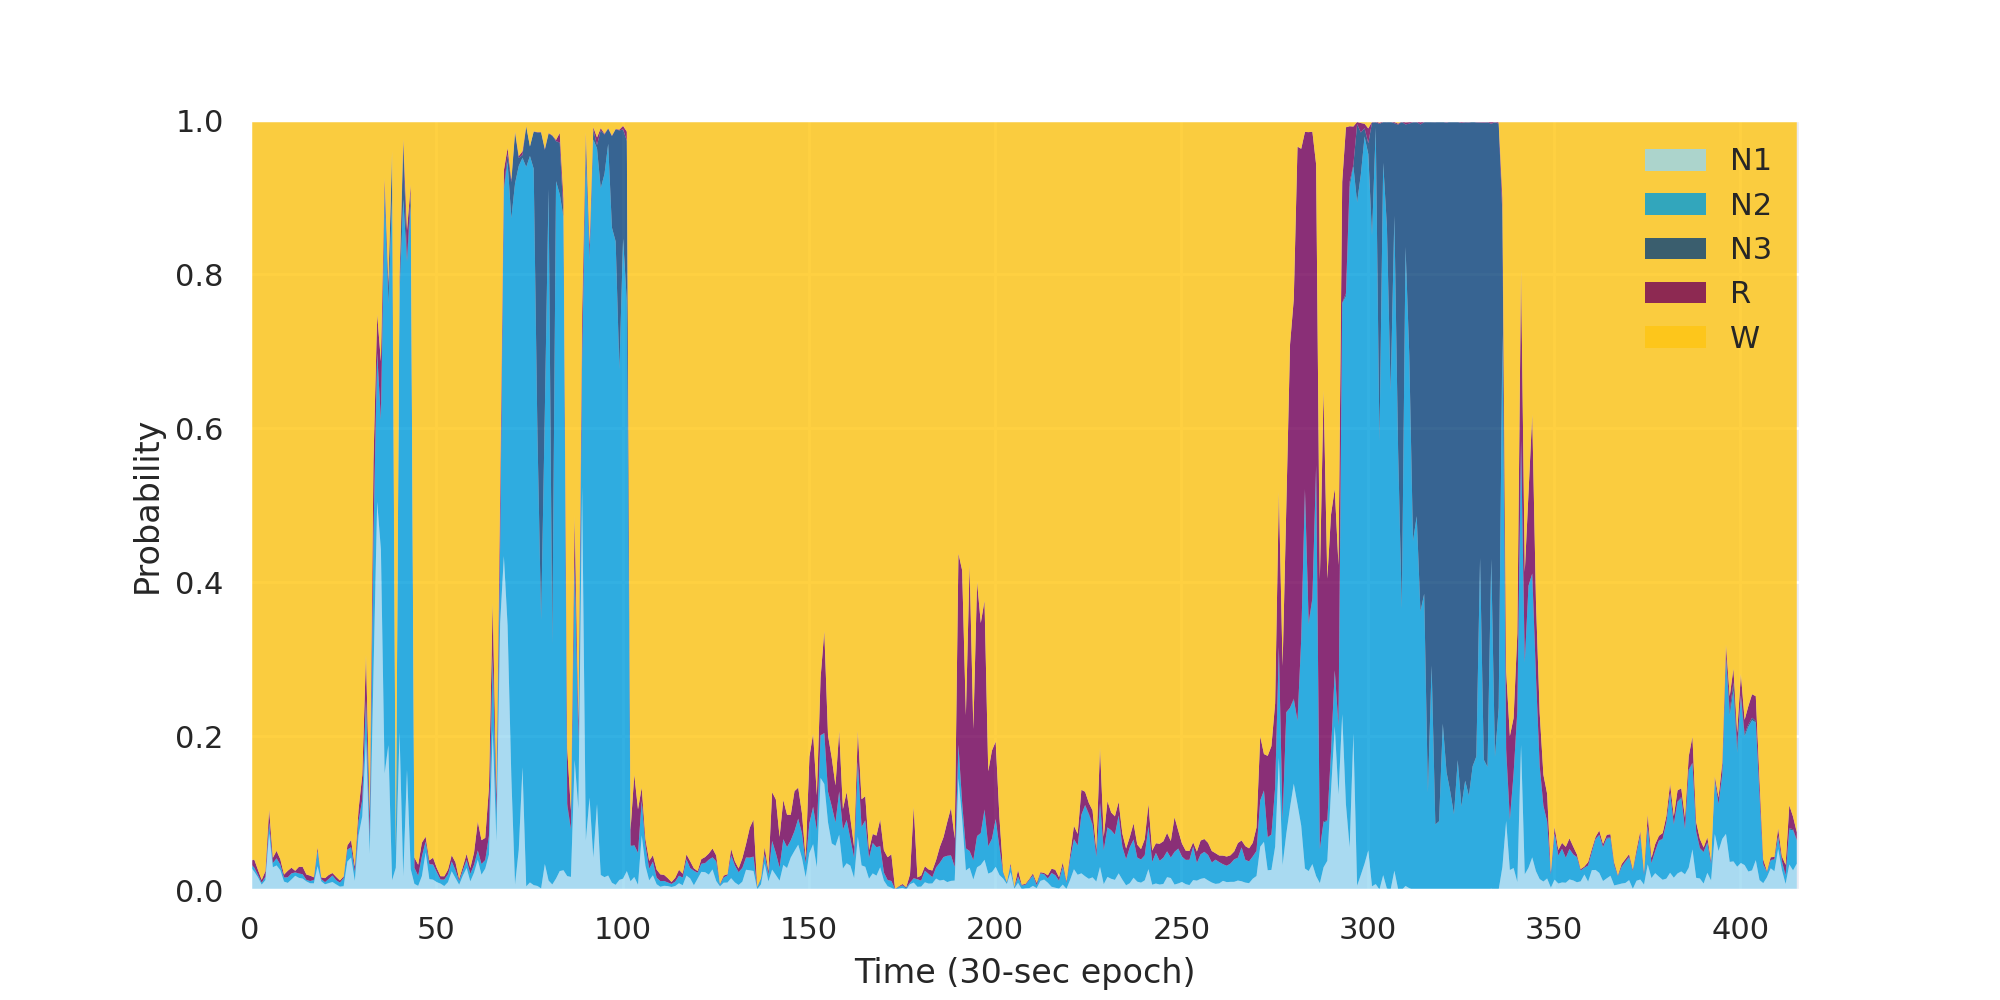

<Axes: xlabel='Time (30-sec epoch)', ylabel='Probability'>

In [8]:
sls.plot_predict_proba()

In [ ]:

# a5 = [0, 101, 177, 336, 415, 416]
# a6 = [0, 85, 174, 294, 336, 415, 416]

a7 = [0, 68, 101, 174, 294, 336, 415, 416]
a10 = [0, 68, 101, 173, 177, 280, 292, 302, 336, 415, 416]
a11 = [0, 68, 101, 173, 177, 275, 281, 292, 302, 336, 415, 416]

